In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

In [4]:
f = open('slot5771427.json')
data = json.load(f)

In [8]:
data[0]

{'slot': '5771427',
 'parent_hash': '0x4ab599a4f1486cbb10d42c7b22bca91ffc4652b0d4bbd0c1aa109e2c61c08ad3',
 'block_hash': '0x8a6a63b206e26b8aa9195cc6a095248601679daa7df53690d5218aea640854ed',
 'builder_pubkey': '0xb2990ad10d4a7e6f6ddee3cc0dd5713c712fc0821cf420f7e59cc30548d0344f68e6daadeec82482993416cbbe001ac5',
 'proposer_pubkey': '0x8b12b546749b4455dfc43d3dfef6f25b04f85500a8baaf2f98e4b143b81292ab7b240bb7da6393894ced8632ae915780',
 'proposer_fee_recipient': '0x0077732907bfc6208933cfd2a51afb8f33ca5958',
 'gas_limit': '30000000',
 'gas_used': '13162326',
 'value': '17924571678621722',
 'num_tx': '135',
 'block_number': '16602426',
 'timestamp': '1676081147',
 'timestamp_ms': '1676081147620'}

In [60]:
builderBids = {}
for v in data:
    shortKey = v['builder_pubkey'][:8]
    try:
        builderBids[shortKey].append((int(v['timestamp_ms']), int(v['value']), int(v['gas_used']), int(v['num_tx'])))
    except KeyError:
        builderBids[shortKey] = [(int(v['timestamp']), int(v['value']), int(v['gas_used']), int(v['num_tx']))]

In [33]:
len(builderBids)

34

In [35]:
builders = list(builderBids.keys())

In [36]:
timeRange = max(times) - min(times)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

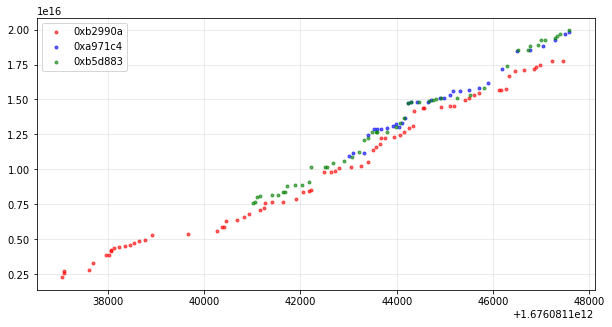

In [48]:
f, ax = plt.subplots(figsize=(10,5))

bids = builderBids[builders[0]][1:]
times = [b[0] for b in bids]
vals = [b[1] for b in bids]

ax.plot(times, vals, 'r.', alpha=0.6, label='{}'.format(builders[0]))

bids = builderBids[builders[1]][1:]
times = [b[0] for b in bids]
vals = [b[1] for b in bids]

ax.plot(times, vals, 'b.', alpha=0.6, label='{}'.format(builders[1]))

bids = builderBids[builders[3]][1:]
times = [b[0] for b in bids]
vals = [b[1] for b in bids]

ax.plot(times, vals, 'g.', alpha=0.6, label='{}'.format(builders[2]))

ax.grid(alpha=0.3)
ax.legend()
plt.show()

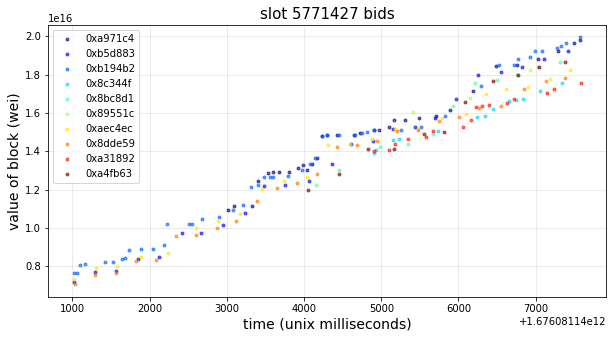

In [65]:
f, ax = plt.subplots(figsize=(10,5))

colors = plt.cm.jet(np.linspace(0,1,10))

for i, b in enumerate(builders[1:11]):
    bids = builderBids[b][1:]
    times = [b[0] for b in bids]
    vals = [b[1] for b in bids]

    ax.plot(times, vals, '.', alpha=0.6, label='{}'.format(b), color=colors[i])

ax.grid(alpha=0.3)
ax.set_title('slot 5771427 bids', size=15)
ax.set_xlabel('time (unix milliseconds)', size=14)
ax.set_ylabel('value of block (wei)', size=14)
ax.legend()
plt.show()